In [11]:
import itertools
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test

import matplotlib.pyplot as plt

In [12]:
def permutation_t_stat_1s(sample, mean):
    t_stat = sum(sample - mean)
    return t_stat

def permutation_null_distr_1s(sample, mean, max_permutations = None):
    centered_sample = sample - mean
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [permutation_t_stat_1s(centered_sample * np.array(signs), 0) for signs in signs_array]
    return distr

def permutation_test_1s(sample, mean, max_permutations = None, alternative = 'two-sided', return_distr = False):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1s(sample, mean)
    
    null_distr = permutation_null_distr_1s(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        p = sum([1. if abs(x) >= abs(t_stat) else 0. for x in null_distr]) / len(null_distr)
    elif alternative == 'less':
        p = sum([1. if x <= t_stat else 0. for x in null_distr]) / len(null_distr)
    else: # alternative == 'greater':
        p = sum([1. if x >= t_stat else 0. for x in null_distr]) / len(null_distr)
        
    if return_distr:
        return {'t': t_stat, 'p': p, 'null_distr': null_distr}
    else:
        return {'t': t_stat, 'p': p}

In [13]:
data = pd.read_csv('failure_times.txt', header=None)
diff = data.diff().dropna().values

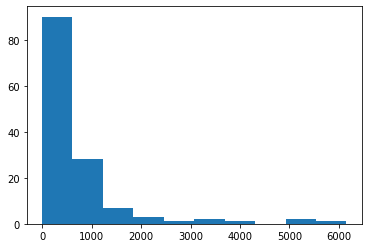

In [31]:
plt.hist(diff)
plt.show()

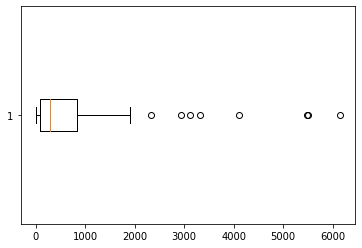

In [35]:
plt.boxplot(diff, notch=False, vert=False)
plt.show()

In [14]:
print('T test:', stats.ttest_1samp(diff, 500.0, alternative='greater'))

T test: Ttest_1sampResult(statistic=array([1.75725363]), pvalue=array([0.04057921]))


In [15]:
print('N observations > than 500: ', len(diff[diff > 500.0]))

N observations > than 500:  49


In [28]:
print('Sign test: p-value=', 1 - stats.binom.cdf(k=48, n=len(diff), p=0.5))

Sign test: p-value= 0.9995002578123924


In [17]:
print('Signed rank test: ', stats.wilcoxon(np.ravel(diff) - 500.0, 
                                           alternative='greater'))

Signed rank test:  WilcoxonResult(statistic=4091.5, pvalue=0.8632079654217537)


In [18]:
np.random.seed(0)
res = permutation_test_1s(np.ravel(diff), 500.0, 
                          return_distr=True, 
                          max_permutations=10000,
                          alternative='greater')
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = 21179.000000, p = 0.036600


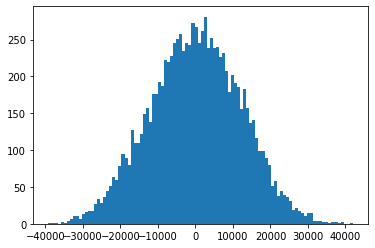

In [19]:
plt.hist(res['null_distr'], bins=100)
plt.show()

In [29]:
round(0.9995002578123924, 4)

0.9995